##   Name: VIKNESH RAJARAMON                
## ASU ID: 1229281354

In [1]:
import sys; sys.path.append('../..') ; sys.path.append('..') ; from my_utils import *

import torch 
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
# dummy trainloader 
trainloader = data.DataLoader(data.TensorDataset(torch.Tensor(1), torch.Tensor(1)), batch_size=1, shuffle=True) 
device = torch.device('cpu')

import matplotlib.pyplot as plt

In this homework, there are three different datasets consisting of 2-dimensional input features and binary class labels, and you will be asked to implement machine learning classifiers.

Let's begin by importing some libaries.

Next, we set a random seed for reproducibility.

In [2]:
import numpy as np
import random

seed = 0
np.random.seed(seed)
torch.random.manual_seed(seed)
random.seed(seed)

# Concentric annuli


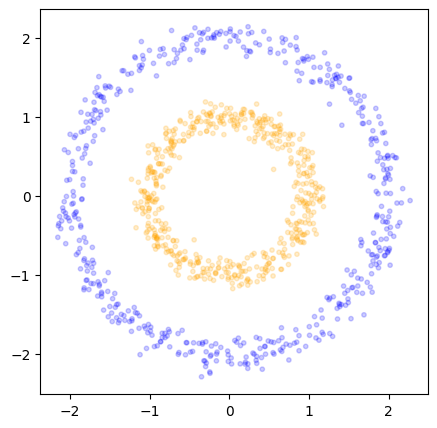

In [3]:
X, y = sample_annuli()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_scatter(ax, X, y)

[2pt] Let's start by implmenting a logistic regression model (like in HW2). Fill the template below to complete the logisitc regression model. Use the binary cross entropy loss, torch.nn.BCELoss.

(i) Complete the model, (ii) finish the training loop, (iii) present the results with a figure (see the example below) and the classification accuracy

In [4]:
class Model(nn.Module):
    def __init__(self,device="cpu"):
        super(Model, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        y = torch.sigmoid(self.linear(x))
        return y

In [5]:
model = Model().to(device)

In [6]:
optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-6)

In [7]:
# complete the following training loop.
for itr in range(1, 1001):
    optimizer.zero_grad() 
    yh = model(X)
    criterion = nn.BCELoss()
    loss = criterion(yh, y.reshape(len(y), 1).float())
    
    print(itr, loss.item())
    
    loss.backward() # backward pass
    optimizer.step()

1 0.7245786190032959
2 0.7223894000053406
3 0.7202721238136292
4 0.7182285785675049
5 0.7162609100341797
6 0.7143705487251282
7 0.712559163570404
8 0.7108280062675476
9 0.7091782689094543
10 0.7076107263565063
11 0.7061260342597961
12 0.7047244906425476
13 0.7034060955047607
14 0.702170729637146
15 0.7010176777839661
16 0.6999459266662598
17 0.6989542841911316
18 0.6980409622192383
19 0.6972042322158813
20 0.6964414119720459
21 0.6957501769065857
22 0.6951273679733276
23 0.6945698261260986
24 0.6940741539001465
25 0.6936365365982056
26 0.6932531595230103
27 0.6929200887680054
28 0.6926332712173462
29 0.6923885941505432
30 0.6921820640563965
31 0.6920096278190613
32 0.6918675899505615
33 0.6917521953582764
34 0.6916598081588745
35 0.6915872693061829
36 0.6915314197540283
37 0.691489577293396
38 0.6914591789245605
39 0.6914379000663757
40 0.6914239525794983
41 0.6914153099060059
42 0.6914108991622925
43 0.6914092302322388
44 0.6914093494415283
45 0.6914104223251343
46 0.6914119124412537


torch.Size([1024, 1])
tensor([0, 1, 0,  ..., 0, 0, 1])


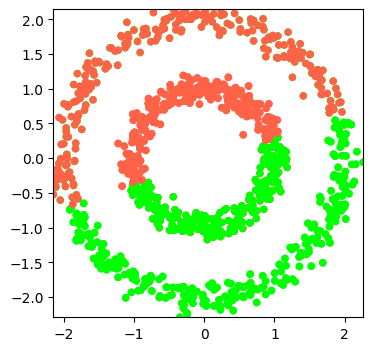

torch.Size([1024, 2])
tensor(484)


In [8]:
# visualize the result and report the accuracy
with torch.no_grad():
    fig = plt.figure(figsize=(4,4))
    axes = []
    axes.append(fig.add_subplot(1, 1, 1))

    xs, ys = X, y.long()
    y_pred = model(xs)
    print(y_pred.shape)
    label = (y_pred[:, 0] >= 0.5).long()
    print(label)
    
    colors = ['lime', 'tomato']
    axes[0].scatter(xs[:, 0], xs[:, 1], c = [colors[yi] for yi in ys], edgecolor='none', s = 30)
    axes[0].scatter(xs[:, 0], xs[:, 1], c = [colors[yi] for yi in label], edgecolor='none', s = 30)
    axes[0].set_xlim(xs[:,0].min(), xs[:,0].max()) ; axes[0].set_ylim(xs[:,1].min(), xs[:,1].max())

    plt.show()

    print(xs.shape)
    err = torch.sum(torch.abs(label - y))
    print(err)

In [9]:
from torchmetrics.classification import BinaryAccuracy

accuracy = BinaryAccuracy()
print("Accuracy:", accuracy(label, y))

Accuracy: tensor(0.5273)


It is obvious that the logistic regression would not be able to distinguish two classes (not linearly separate data). You will have to build another model. 

[2pt] [Feature engineering] In the class template below, implement your own model that will achieve 100% accuracy in classifying the data poitns in training set. There is one restriction; you are allowed to use "one" linear layer for your implementation as in the logistic regression model above. But you are allowed to use as many nonlinear functions as needed to engineer hand-crafted features.  

In [10]:
class Model(nn.Module):
    def __init__(self,device="cpu"):
        super(Model, self).__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        x_new = torch.column_stack((x, sqrt(x[:, 0]**2 + x[:, 1]**2)))
        y = torch.sigmoid(self.linear(x_new))
        return y

In [11]:
model = Model().to(device)

In [12]:
optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-6)

In [13]:
for itr in range(1, 1001):
    optimizer.zero_grad()      
    yh = model(X)
    criterion = nn.BCELoss()
    loss = criterion(yh, y.reshape(len(y), 1).float())
    
    print(itr, loss.item())
    
    loss.backward()
    optimizer.step()

1 0.7945778965950012
2 0.7888028025627136
3 0.7831438779830933
4 0.7776062488555908
5 0.7721947431564331
6 0.7669144868850708
7 0.7617701888084412
8 0.7567667961120605
9 0.7519086599349976
10 0.7472001910209656
11 0.7426453828811646
12 0.7382477521896362
13 0.734010636806488
14 0.7299368381500244
15 0.726028323173523
16 0.7222870588302612
17 0.7187137603759766
18 0.715308666229248
19 0.7120712995529175
20 0.709000289440155
21 0.706093430519104
22 0.7033476829528809
23 0.7007590532302856
24 0.6983227729797363
25 0.6960332989692688
26 0.6938842535018921
27 0.6918684840202332
28 0.6899783611297607
29 0.6882057189941406
30 0.6865419745445251
31 0.684978187084198
32 0.6835054755210876
33 0.6821145415306091
34 0.68079674243927
35 0.6795429587364197
36 0.6783450245857239
37 0.6771947741508484
38 0.6760845184326172
39 0.6750072836875916
40 0.6739566326141357
41 0.6729263663291931
42 0.6719115972518921
43 0.6709073781967163
44 0.6699097752571106
45 0.6689152121543884
46 0.6679208874702454
47 0.

torch.Size([1024, 1])
tensor([1, 1, 1,  ..., 0, 0, 0])


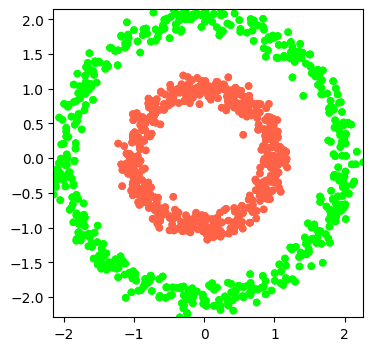

torch.Size([1024, 2])
tensor(0)


In [14]:
with torch.no_grad():
    fig = plt.figure(figsize=(4,4))
    axes = []
    axes.append(fig.add_subplot(1, 1, 1))

    xs, ys = X, y.long()
    y_pred = model(xs)
    print(y_pred.shape)
    label = (y_pred[:, 0] >= 0.5).long()
    print(label)

    colors = ['lime', 'tomato']
    axes[0].scatter(xs[:, 0], xs[:, 1], c = [colors[yi] for yi in ys], edgecolor='none', s = 30)
    axes[0].scatter(xs[:, 0], xs[:, 1], c = [colors[yi] for yi in label], edgecolor='none', s = 30)
    axes[0].set_xlim(xs[:,0].min(), xs[:,0].max()) ; axes[0].set_ylim(xs[:,1].min(), xs[:,1].max())

    plt.show()

    print(xs.shape)
    err = torch.sum(torch.abs(label - y))
    print(err)

# Spiral dataset


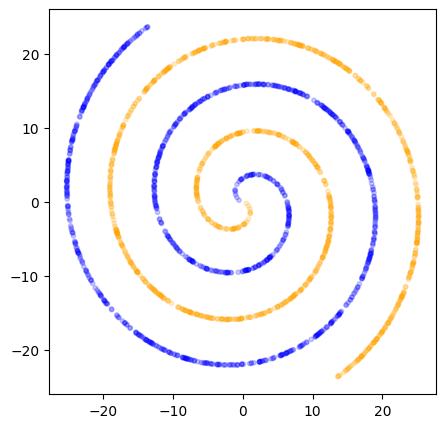

In [15]:
X, y = sample_spiral()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_scatter(ax, X, y)

It's obvious that neither the logistic regression nor the model you developed for the second dataset would not work for this dataset. 

[2pt] implemente a neural network of your choice and achieve 100% classification accuracy

In [16]:
class Model(nn.Module):
    def __init__(self,device="cpu"):
        super(Model, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(2, 25),
            nn.Tanh(),
            nn.Linear(25, 25),
            nn.Tanh(),
            nn.Linear(25, 25),
            nn.Tanh(),
            nn.Linear(25, 1),
        )

    def forward(self, x):
        x = self.mlp(x)
        y = torch.sigmoid(x)
        return y

In [17]:
model = Model().to(device)

In [18]:
optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-6)

In [19]:
for itr in range(1, 1001):
    optimizer.zero_grad()

    # complete here
    yh = model(X)
    criterion = nn.BCELoss()
    loss = criterion(yh, y.reshape(len(y), 1).float())
    
    print(itr, loss.item())
    
    loss.backward()
    optimizer.step()

1 0.6974698305130005
2 0.6827670931816101
3 0.6770453453063965
4 0.6754062175750732
5 0.6727900505065918
6 0.6698701977729797
7 0.669154703617096
8 0.6694102883338928
9 0.6687182188034058
10 0.6670119762420654
11 0.6654881834983826
12 0.6648540496826172
13 0.6643548011779785
14 0.6635960340499878
15 0.6626991033554077
16 0.6617313027381897
17 0.6608375310897827
18 0.6596678495407104
19 0.657943606376648
20 0.6560603380203247
21 0.6541173458099365
22 0.6520832180976868
23 0.6493954658508301
24 0.6466507315635681
25 0.6436477303504944
26 0.6400660872459412
27 0.6368534564971924
28 0.6338056921958923
29 0.6324352025985718
30 0.6363856196403503
31 0.6300246715545654
32 0.6299541592597961
33 0.6302490234375
34 0.6251705884933472
35 0.628074049949646
36 0.6218366622924805
37 0.6237374544143677
38 0.6180676221847534
39 0.6189875602722168
40 0.614490270614624
41 0.6142494082450867
42 0.6115397810935974
43 0.6104705333709717
44 0.609589159488678
45 0.6075052618980408
46 0.6087281703948975
47 0.

torch.Size([2048, 1])
tensor([0, 0, 0,  ..., 1, 1, 1])


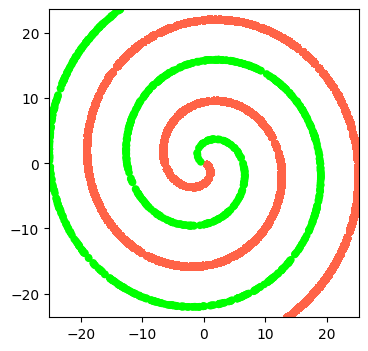

torch.Size([2048, 2])
tensor(0)


In [20]:
with torch.no_grad():
    fig = plt.figure(figsize=(4,4))
    axes = []
    axes.append(fig.add_subplot(1, 1, 1))
    xs, ys = X, y.long()
    y_pred = model(xs)

    print(y_pred.shape)
    label = (y_pred[:,0] >= 0.5).long()
    print(label)

    colors = ['lime','tomato']
    for i in range(1024):
        axes[0].scatter(xs[i,0], xs[i,1], c=colors[label[i]], edgecolor='none', s=30)
        axes[0].scatter(xs[i+1024:,0], xs[i+1024:,1], c=colors[label[i+1024]], edgecolor='none', s=30)
    axes[0].set_xlim(xs[:, 0].min(), xs[:, 0].max()) ; axes[0].set_ylim(xs[:, 1].min(), xs[:, 1].max())
    
    plt.show()
   
    print(xs.shape)
    err = torch.sum(torch.abs(label - y))
    print(err)